In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import feature_engine.wrappers as few
import feature_engine.transformation as fet
pd.set_option('display.max_columns', 100)

In [2]:
data = pd.read_csv('owid-covid-data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155858 entries, 0 to 155857
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    155858 non-null  object 
 1   continent                                   146487 non-null  object 
 2   location                                    155858 non-null  object 
 3   date                                        155858 non-null  object 
 4   total_cases                                 153028 non-null  float64
 5   new_cases                                   152977 non-null  float64
 6   new_cases_smoothed                          151826 non-null  float64
 7   total_deaths                                135644 non-null  float64
 8   new_deaths                                  135820 non-null  float64
 9   new_deaths_smoothed                         135688 non-null  float64
 

In [3]:
numerical_columns = []
categorical_columns = []
for column in data.columns:
    if data[column].dtype == float:
        numerical_columns.append(column)
    else:
        categorical_columns.append(column)

In [4]:
# Handling missing numerical values
imputer = IterativeImputer(max_iter = 1000, verbose=1)
data[numerical_columns] = pd.DataFrame(imputer.fit_transform(data[numerical_columns]), columns = numerical_columns)

[IterativeImputer] Completing matrix with shape (155858, 62)
[IterativeImputer] Change: 5898430182.313889, scaled tolerance: 9788986.851 
[IterativeImputer] Change: 15257873.774624482, scaled tolerance: 9788986.851 
[IterativeImputer] Change: 200530.9712930398, scaled tolerance: 9788986.851 
[IterativeImputer] Early stopping criterion reached.


In [5]:
# Checking for gaussian distribution of numerical variables using anderson test
gaussian_columns = []
non_gaussian_columns = []
for column in numerical_columns:
    result = st.anderson(data[column])
    if result[0] > result[1][2]:
        non_gaussian_columns.append(column)
    else:
        gaussian_columns.append(column)
print(f"List of gaussian variables: {gaussian_columns}")
print(f"List of non-gaussian variables: {non_gaussian_columns}")

List of gaussian variables: []
List of non-gaussian variables: ['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'tot

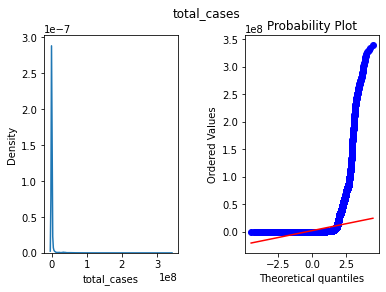

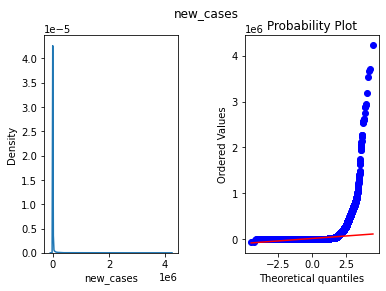

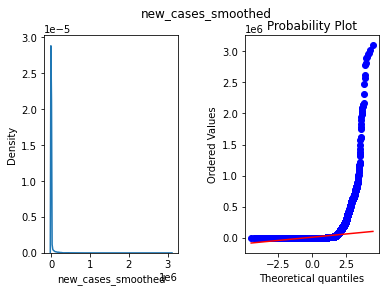

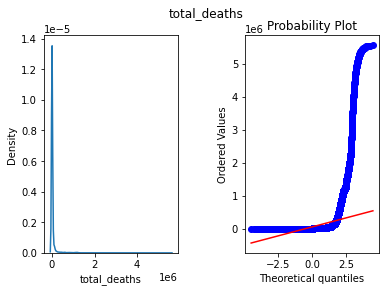

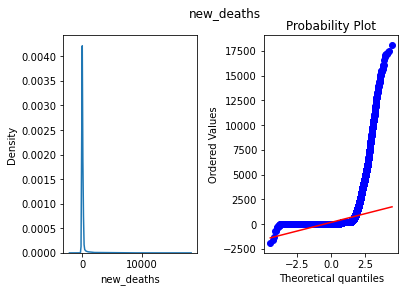

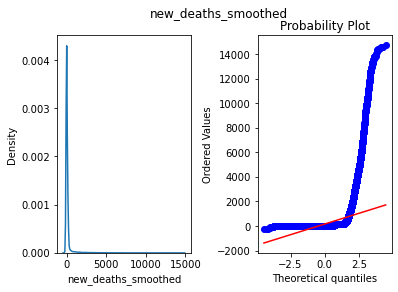

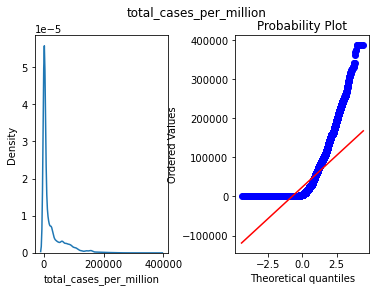

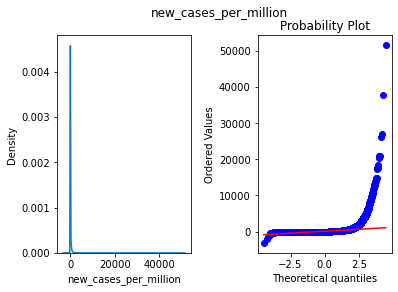

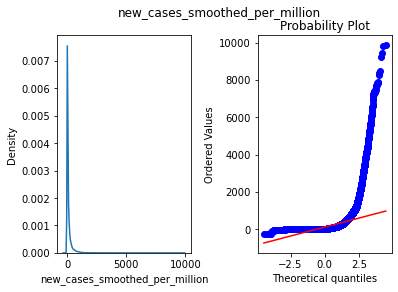

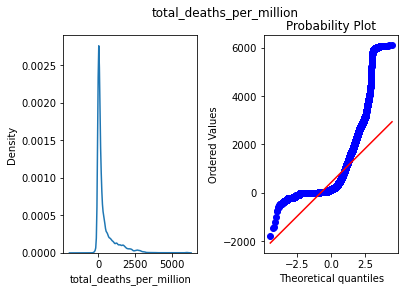

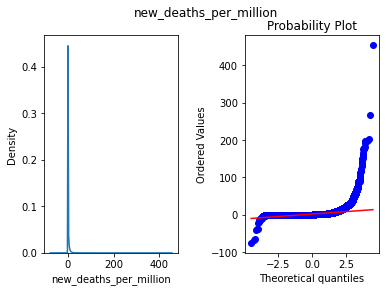

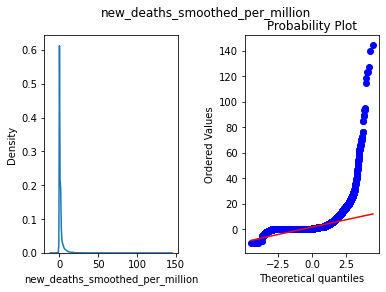

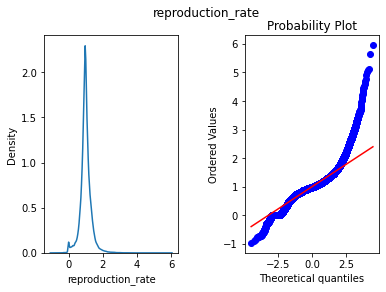

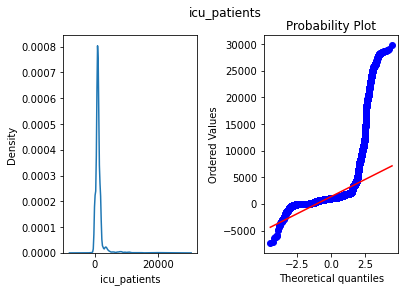

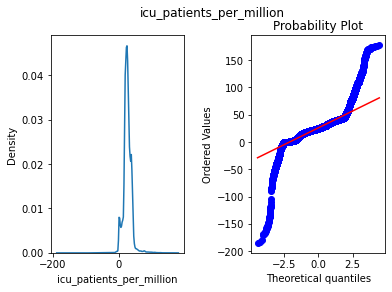

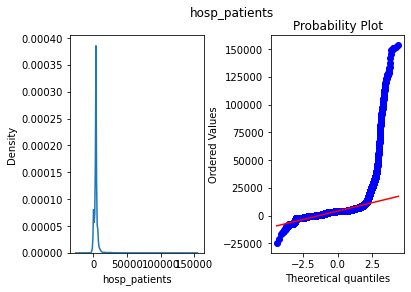

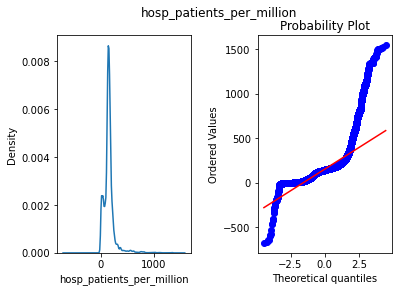

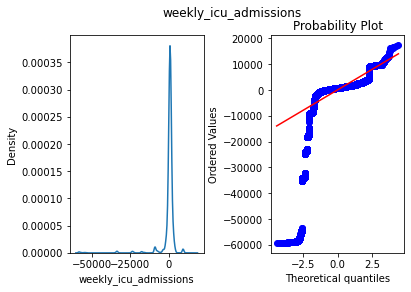

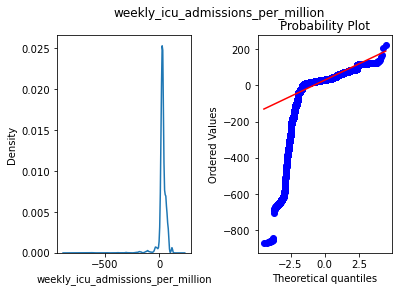

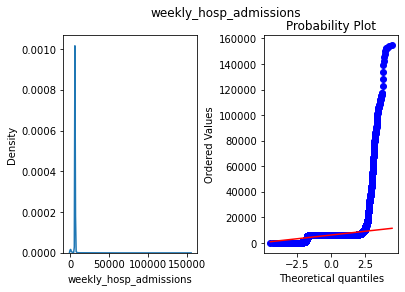

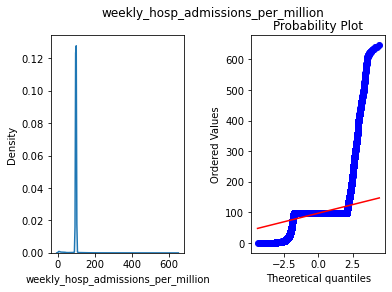

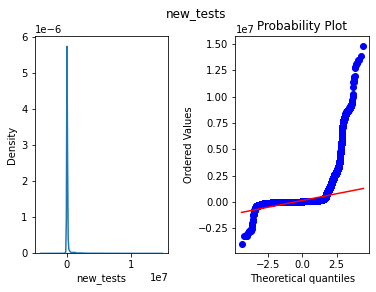

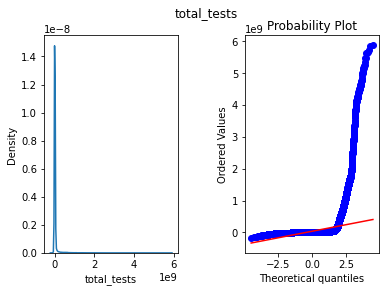

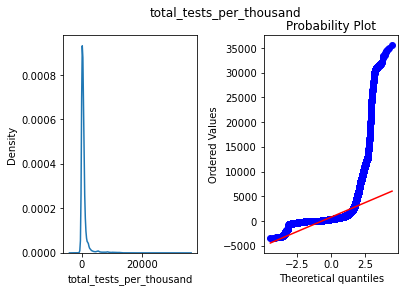

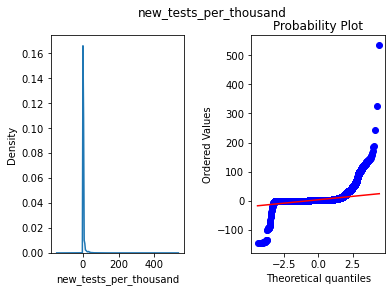

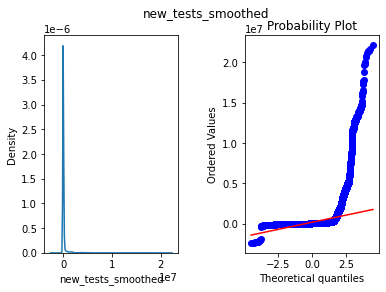

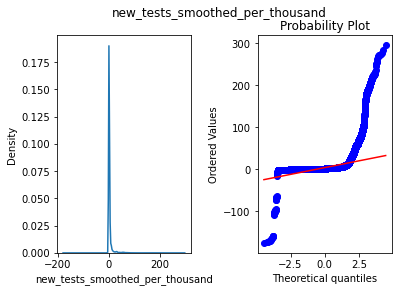

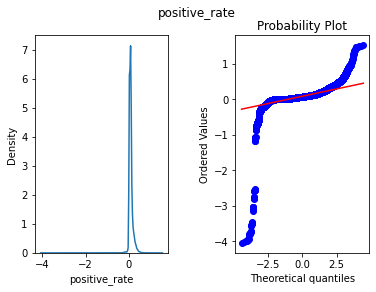

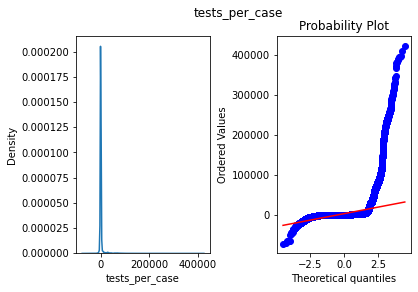

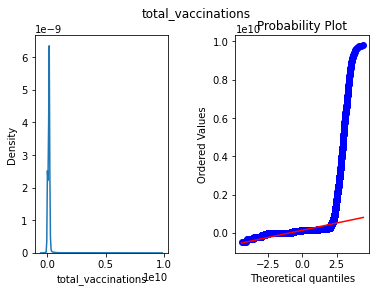

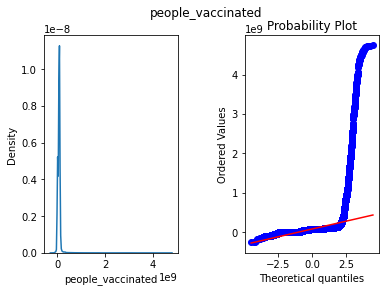

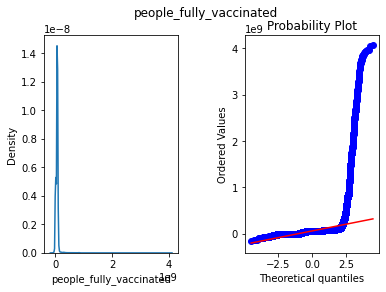

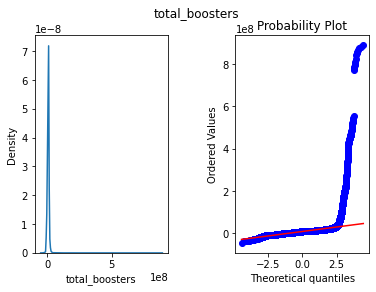

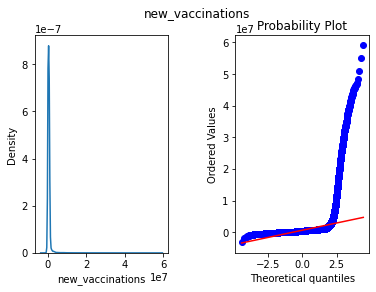

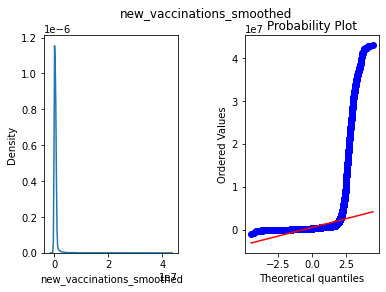

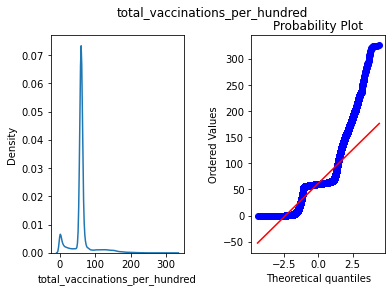

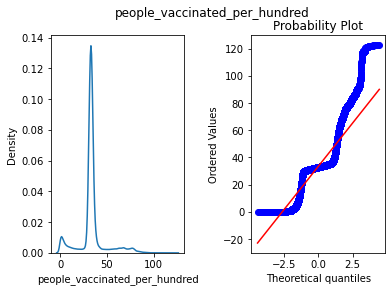

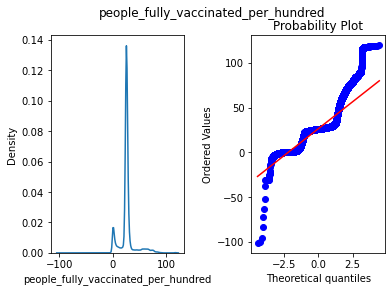

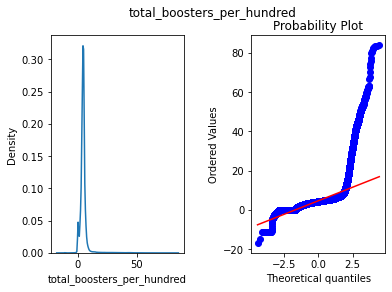

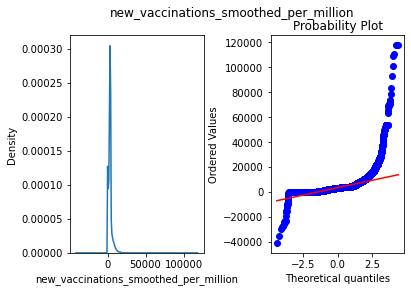

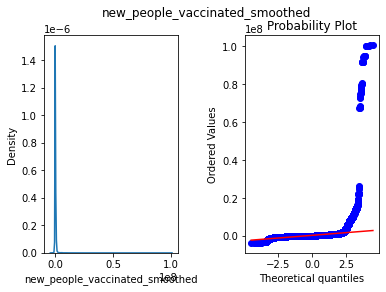

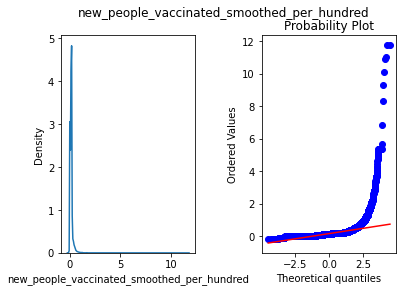

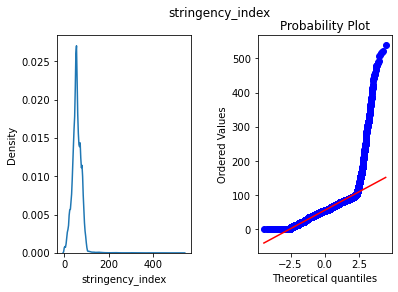

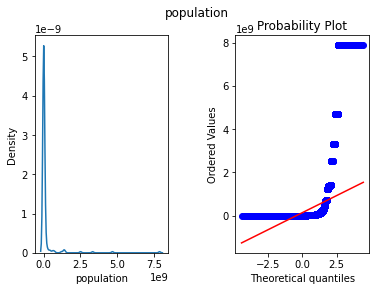

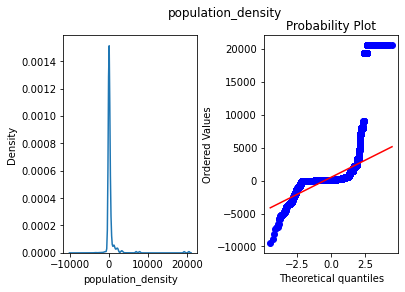

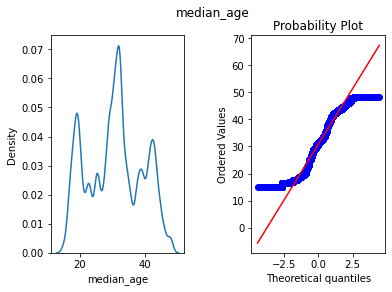

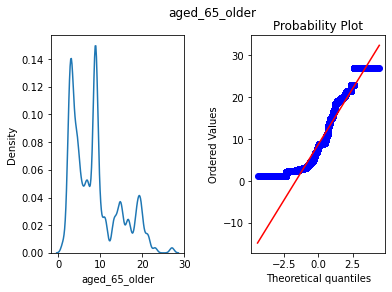

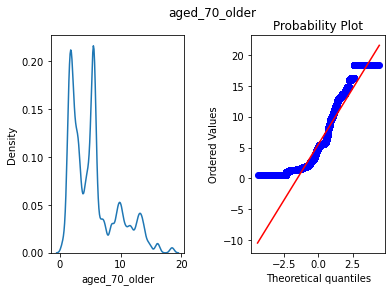

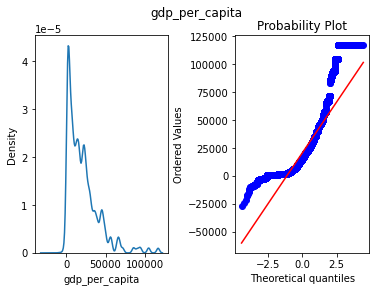

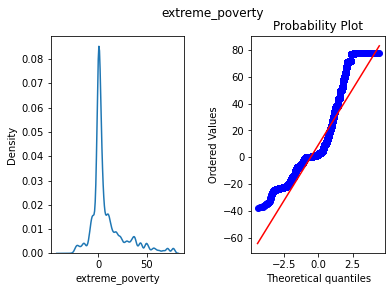

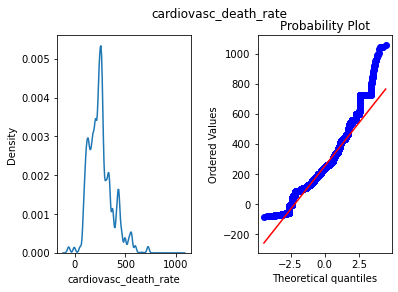

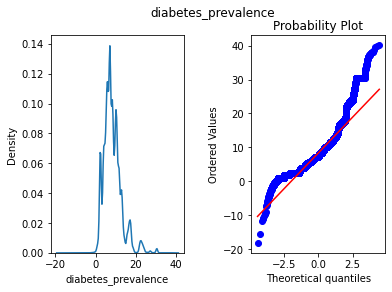

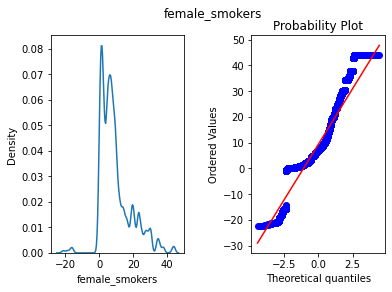

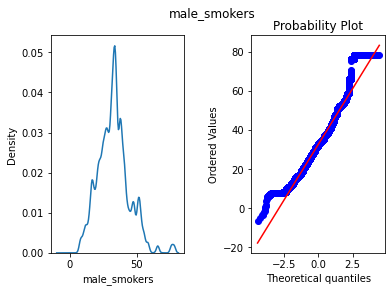

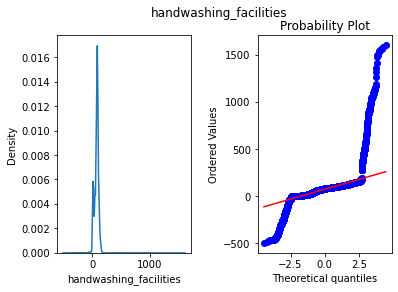

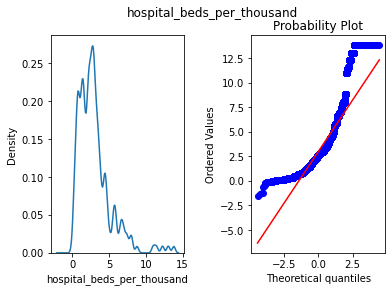

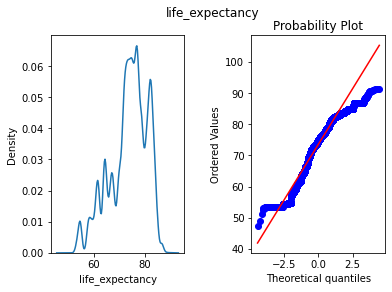

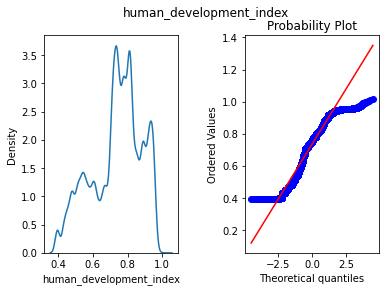

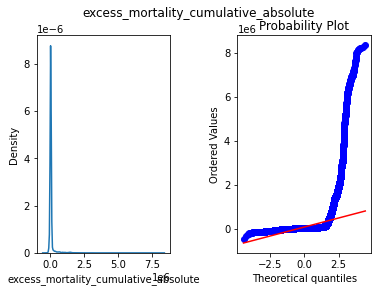

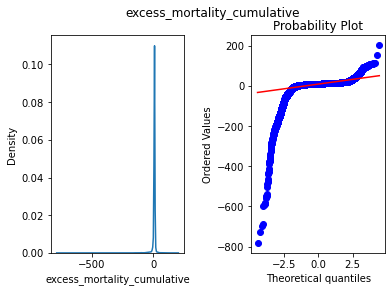

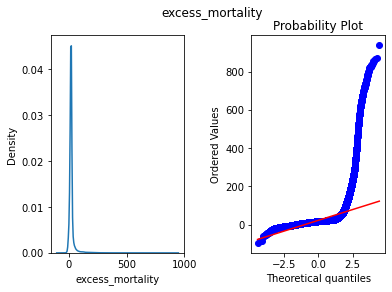

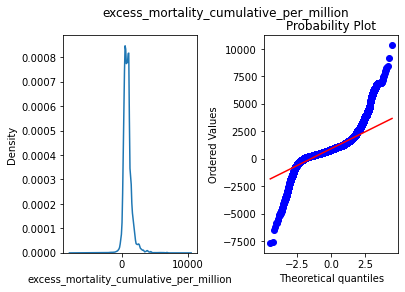

In [6]:
for column in non_gaussian_columns:
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=data, x=column,ax=ax[0])
    st.probplot(data[column], plot=ax[1])
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(column)
    plt.show()

# Feature Transformation

For features of a given dataset, features that are very skewed can be treated using various feature transformation techniques to make features more gaussian distributed.

Sometimes, feature transformation can help to improve model performance, but this requires trial and error to determine the impact of feature transformation on model performance.

The following are the types of feature transformation techniques available:

1. Log Transformer (Works for strictly positive values)
2. Reciprocal Transformer (Works for non-zero values)
3. Power Transformer (Works for all values, except for negative values when power is less than 1)
4. Box-cox Transformer (Works for strictly positive values)
5. Yeo-johnsson Transformer (Works for all values)

Note that target variables of a given dataset for regression problems can also be transformed using any of the techniques mentioned above to reduce skewness of data (data imbalance problem). However, model performance evaluation needs to be done on the original scale of the target variable, which will require an inverse transform on predictions for proper comparison.

## Log Transformer

In [7]:
transformer = fet.LogTransformer(variables = 'population')
data_transformed = transformer.fit_transform(data)

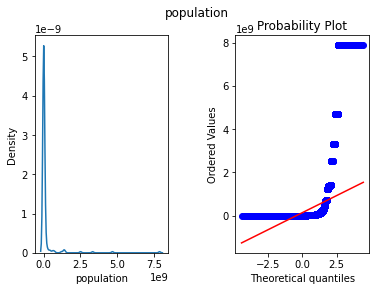

Skewness of population before log transformation: 8.104991963969411
Kurtosis of population before log transformation: 75.22218247760208
AndersonResult(statistic=46638.314691716776, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [8]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='population',ax=ax[0])
st.probplot(data['population'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('population')
plt.show()
print(f"Skewness of population before log transformation: {data['population'].skew()}")
print(f"Kurtosis of population before log transformation: {data['population'].kurt()}")
print(st.anderson(data['population']))

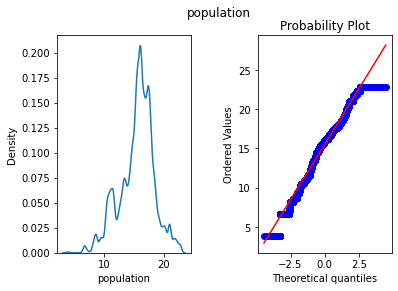

Skewness of population after log transformation: -0.4160750755805966
Kurtosis of population after log transformation: 3.3565360206142842
AndersonResult(statistic=1481.0964865571295, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [9]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data_transformed, x='population',ax=ax[0])
st.probplot(data_transformed['population'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('population')
plt.show()
print(f"Skewness of population after log transformation: {data_transformed['population'].skew()}")
print(f"Kurtosis of population after log transformation: {data_transformed['population'].kurt()+3}")
print(st.anderson(data_transformed['population']))

## Reciprocal Transformer

In [10]:
transformer = fet.ReciprocalTransformer(variables = 'human_development_index')
data_transformed = transformer.fit_transform(data)

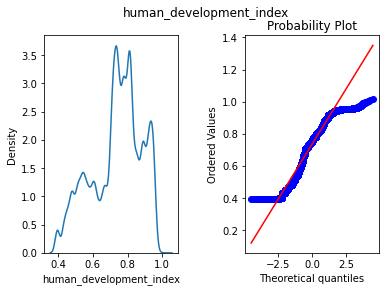

Skewness of human_development_index before reciprocal transformation: -0.4925848145043167
Kurtosis of human_development_index before reciprocal transformation: 2.4088230023383628
AndersonResult(statistic=1963.044836318848, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [11]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='human_development_index',ax=ax[0])
st.probplot(data['human_development_index'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('human_development_index')
plt.show()
print(f"Skewness of human_development_index before reciprocal transformation: {data['human_development_index'].skew()}")
print(f"Kurtosis of human_development_index before reciprocal transformation: {data['human_development_index'].kurt()+3}")
print(st.anderson(data['human_development_index']))

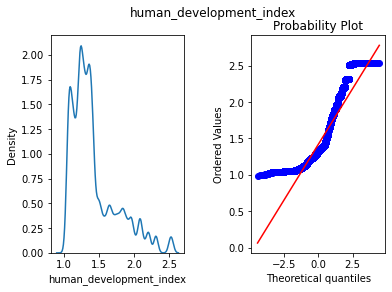

Skewness of human_development_index after reciprocal transformation: 1.2807662296102371
Kurtosis of human_development_index after reciprocal transformation: 4.079455062824209
AndersonResult(statistic=6875.308598773961, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [12]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data_transformed, x='human_development_index',ax=ax[0])
st.probplot(data_transformed['human_development_index'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('human_development_index')
plt.show()
print(f"Skewness of human_development_index after reciprocal transformation: {data_transformed['human_development_index'].skew()}")
print(f"Kurtosis of human_development_index after reciprocal transformation: {data_transformed['human_development_index'].kurt()+3}")
print(st.anderson(data_transformed['human_development_index']))

## Power Transformer

In [13]:
transformer = fet.PowerTransformer(variables = 'aged_70_older',exp=1/2)
data_transformed = transformer.fit_transform(data)

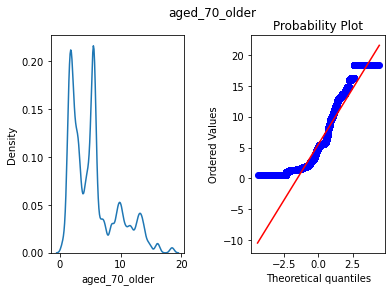

Skewness of aged_70_older before power transformation: 0.9961962048011809
Kurtosis of aged_70_older before power transformation: 3.2193431004163875
AndersonResult(statistic=5551.125006913731, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [14]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='aged_70_older',ax=ax[0])
st.probplot(data['aged_70_older'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('aged_70_older')
plt.show()
print(f"Skewness of aged_70_older before power transformation: {data['aged_70_older'].skew()}")
print(f"Kurtosis of aged_70_older before power transformation: {data['aged_70_older'].kurt()+3}")
print(st.anderson(data['aged_70_older']))

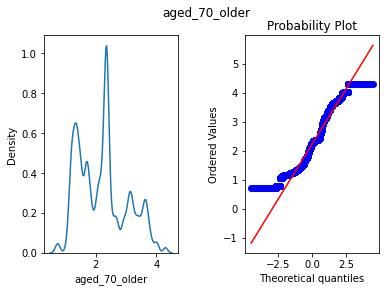

Skewness of aged_70_older after power transformation: 0.44930249023842567
Kurtosis of aged_70_older after power transformation: 2.3225121340504953
AndersonResult(statistic=2335.3054687348485, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [15]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data_transformed, x='aged_70_older',ax=ax[0])
st.probplot(data_transformed['aged_70_older'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('aged_70_older')
plt.show()
print(f"Skewness of aged_70_older after power transformation: {data_transformed['aged_70_older'].skew()}")
print(f"Kurtosis of aged_70_older after power transformation: {data_transformed['aged_70_older'].kurt()+3}")
print(st.anderson(data_transformed['aged_70_older']))

## Box-Cox Transformer

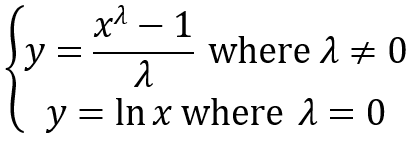

For box-cox transformer, an optimal lambda value is determined between -5 and 5.

In [16]:
transformer = few.SklearnTransformerWrapper(PowerTransformer(method='box-cox'),variables='population')
data_transformed = transformer.fit_transform(data)

In [17]:
# Most optimal lambda value
transformer.transformer_.lambdas_

array([0.04495633])

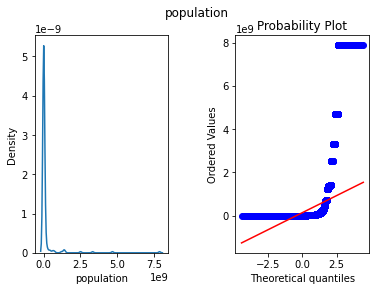

Skewness of population before box-cox transformation: 8.104991963969411
Kurtosis of population before box-cox transformation: 75.22218247760208
AndersonResult(statistic=46638.314691716776, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [18]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='population',ax=ax[0])
st.probplot(data['population'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('population')
plt.show()
print(f"Skewness of population before box-cox transformation: {data['population'].skew()}")
print(f"Kurtosis of population before box-cox transformation: {data['population'].kurt()}")
print(st.anderson(data['population']))

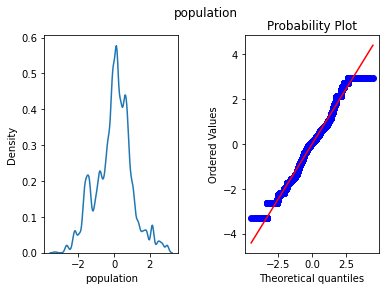

Skewness of population after box-cox transformation: 0.009508670031406286
Kurtosis of population after box-cox transformation: 0.2911217447814183
AndersonResult(statistic=844.8110539828776, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [19]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data_transformed, x='population',ax=ax[0])
st.probplot(data_transformed['population'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('population')
plt.show()
print(f"Skewness of population after box-cox transformation: {data_transformed['population'].skew()}")
print(f"Kurtosis of population after box-cox transformation: {data_transformed['population'].kurt()}")
print(st.anderson(data_transformed['population']))

## Yeo-Johnsson Transformer

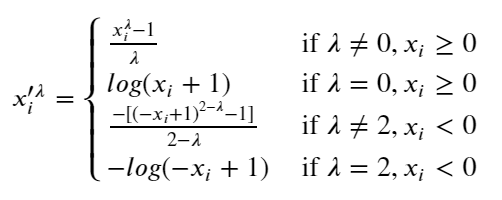

For yeo-johnsson transformer, an optimal lambda value is determined between -5 and 5.

In [20]:
transformer = few.SklearnTransformerWrapper(PowerTransformer(method='yeo-johnson'),variables='total_cases_per_million')
data_transformed = transformer.fit_transform(data)

In [21]:
# Most optimal lambda value
transformer.transformer_.lambdas_

array([0.12326296])

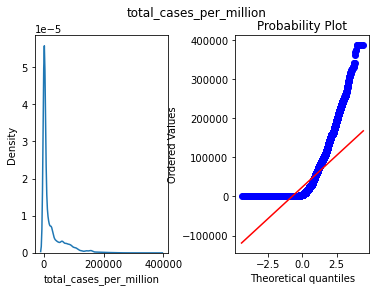

Skewness of total_cases_per_million before yeo-johnsson transformation: 2.3876677151802523
Kurtosis of total_cases_per_million before yeo-johnsson transformation: 6.951130202327848
AndersonResult(statistic=18397.35706256813, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [22]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data, x='total_cases_per_million',ax=ax[0])
st.probplot(data['total_cases_per_million'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('total_cases_per_million')
plt.show()
print(f"Skewness of total_cases_per_million before yeo-johnsson transformation: {data['total_cases_per_million'].skew()}")
print(f"Kurtosis of total_cases_per_million before yeo-johnsson transformation: {data['total_cases_per_million'].kurt()}")
print(st.anderson(data['total_cases_per_million']))

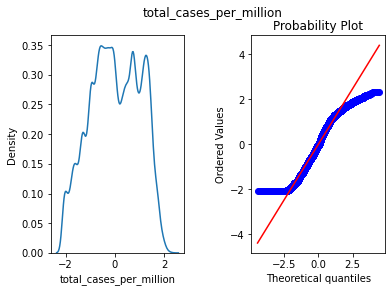

Skewness of total_cases_per_million after yeo-johnsson transformation: -0.11159359206510723
Kurtosis of total_cases_per_million after yeo-johnsson transformation: -0.9324259774802921
AndersonResult(statistic=908.046537671733, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [23]:
f, ax = plt.subplots(1,2)
sns.kdeplot(data=data_transformed, x='total_cases_per_million',ax=ax[0])
st.probplot(data_transformed['total_cases_per_million'], plot=ax[1])
plt.subplots_adjust(wspace=0.5)
plt.suptitle('total_cases_per_million')
plt.show()
print(f"Skewness of total_cases_per_million after yeo-johnsson transformation: {data_transformed['total_cases_per_million'].skew()}")
print(f"Kurtosis of total_cases_per_million after yeo-johnsson transformation: {data_transformed['total_cases_per_million'].kurt()}")
print(st.anderson(data_transformed['total_cases_per_million']))

# Feature Scaling

Feature scaling prevents variables with large values from dominating over variables with smaller values in ML algorithms.

ML algorithms that uses either gradient descent or euclidean distance concept requires feature scaling for speeding up model training and potentially improve model performance.

ML algorithms that uses Gradient Descent:
1. Linear Regression
2. Neural Networks

ML algorithms that uses Euclidean Distance:
1. SVM
2. KNN
3. K-Means Clustering
4. Hierarchical Clustering
5. PCA

Note that feature scaling is usually performed after feature transformation. Scaler model fitted on the training set will be used to transform the test set.

The following are the types of feature scaling techniques:
1. Standard Scaler
2. Min-Max Scaler
3. Robust Scaler

## Standard Scaler

Standard Scaler is used for gaussian distribution without outliers by scaling features to similar scale using mean and standard deviation.

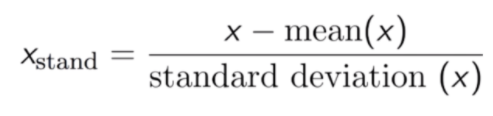

Note that standard scaler can be used on variables after removing outliers if possible and it is the most recommended approach for feature scaling.

In [24]:
scaler = few.SklearnTransformerWrapper(StandardScaler(),variables=numerical_columns)
data_transformed = scaler.fit_transform(data)

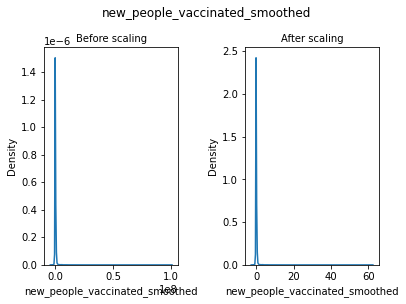

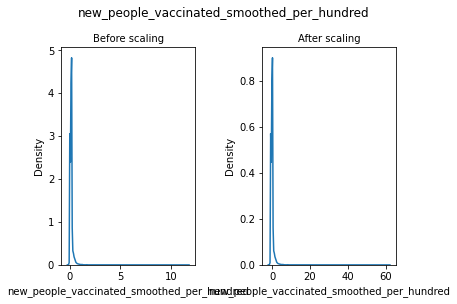

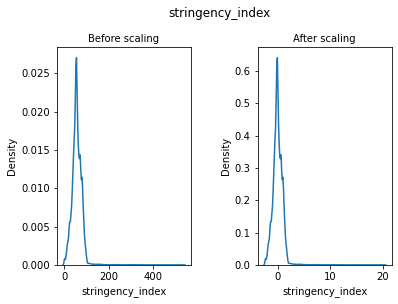

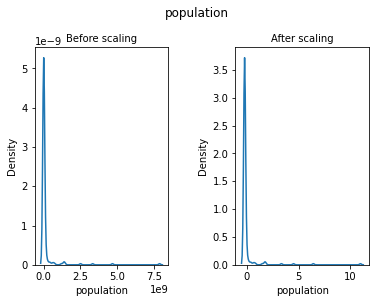

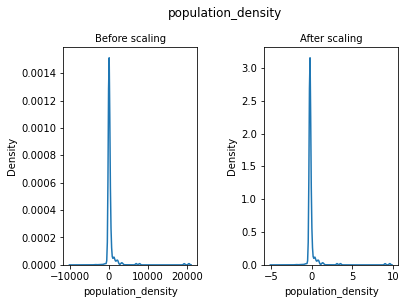

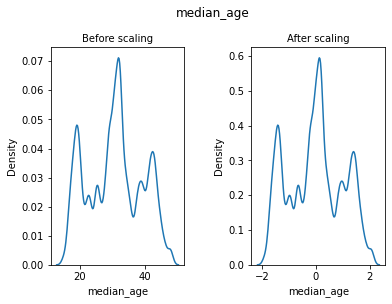

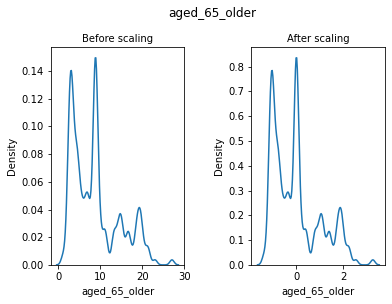

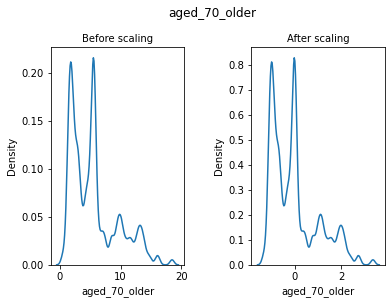

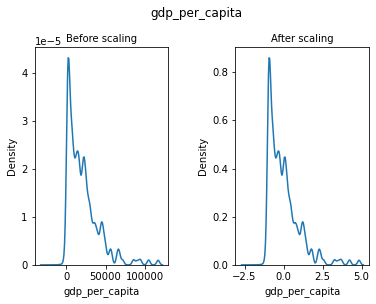

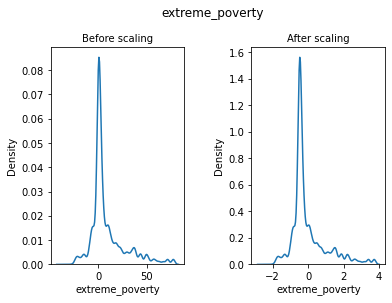

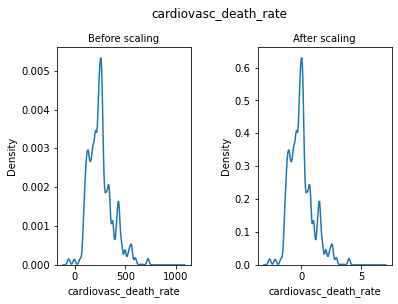

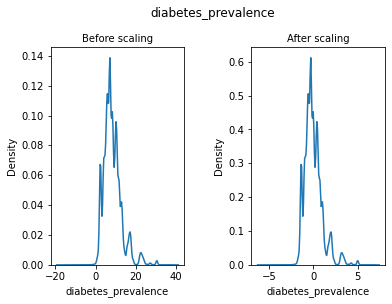

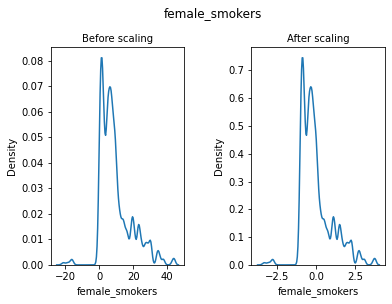

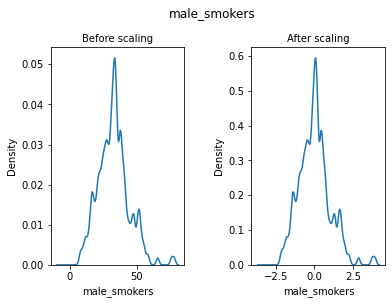

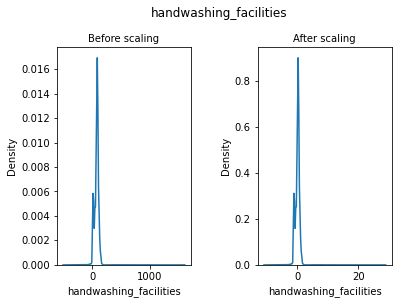

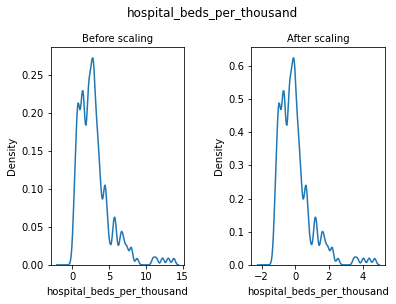

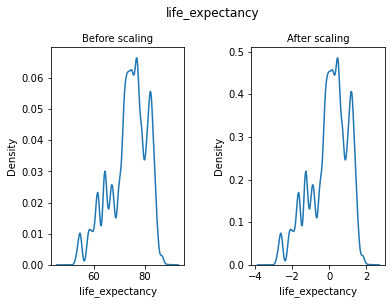

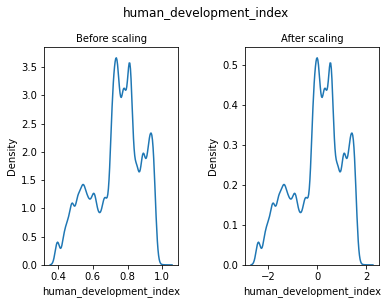

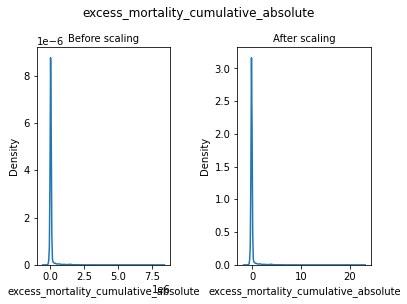

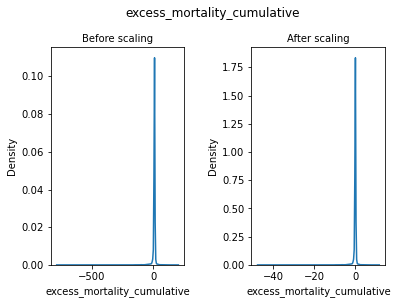

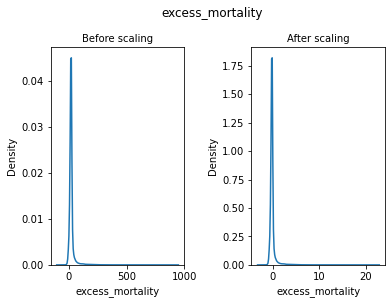

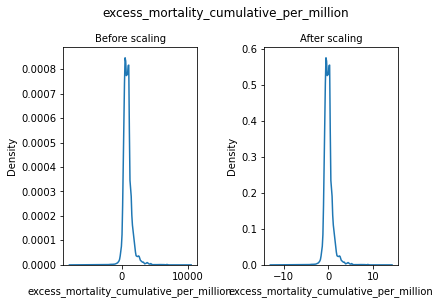

In [25]:
for column in non_gaussian_columns[40:]:
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=data, x=column,ax=ax[0])
    sns.kdeplot(data=data_transformed, x=column,ax=ax[1])
    ax[0].set_title('Before scaling',fontsize=10)
    ax[1].set_title('After scaling',fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(column,y=1.02)
    plt.show()

## Min-Max Scaler

Min-Max scaler is used to scale features to similar scale between 0 and 1 by using minimum and maximum values.

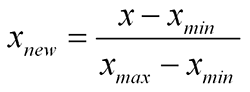

Note that min-max scaler is most commonly used in Convolutional Neural Networks (CNN).

In [26]:
scaler = few.SklearnTransformerWrapper(MinMaxScaler(),variables=numerical_columns)
data_transformed = scaler.fit_transform(data)

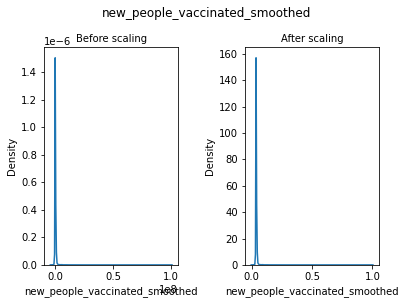

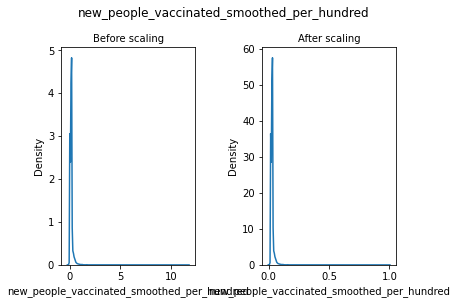

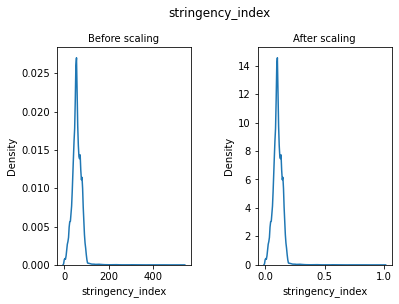

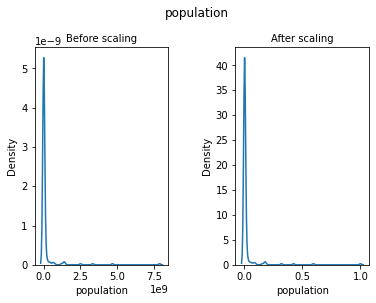

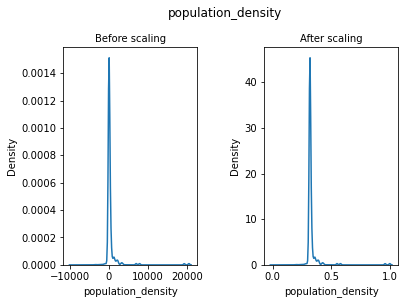

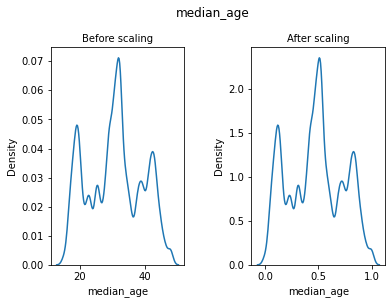

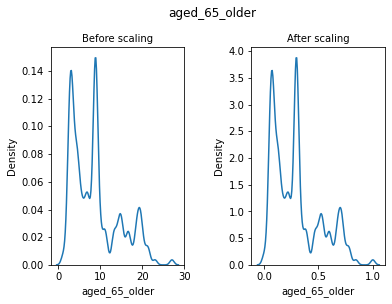

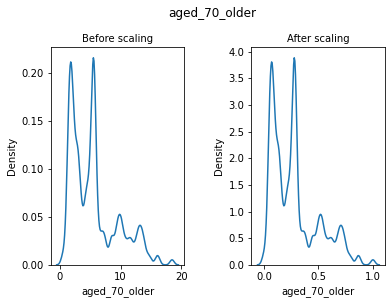

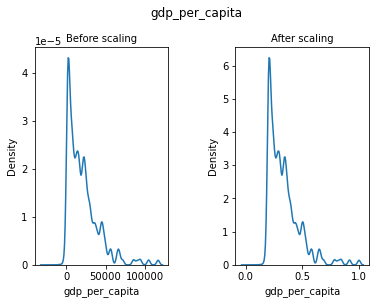

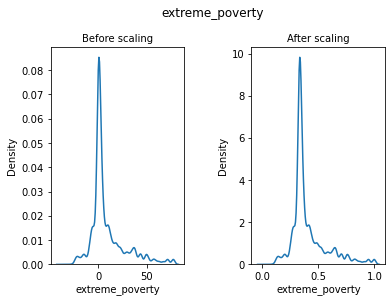

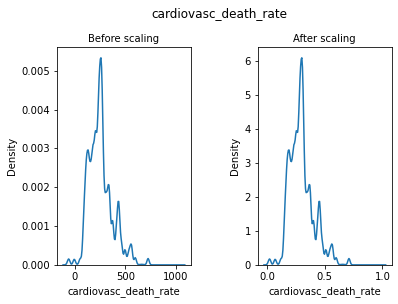

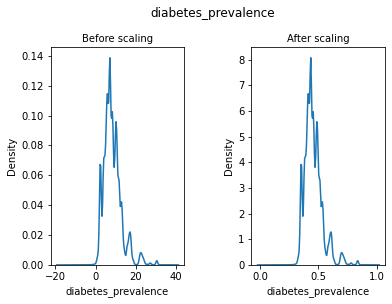

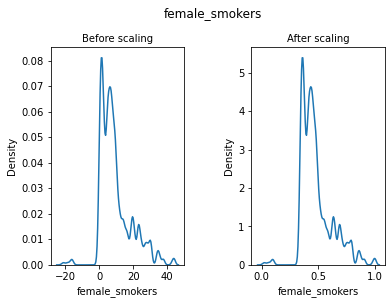

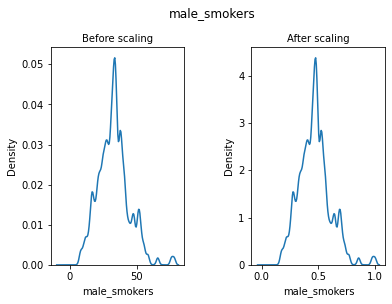

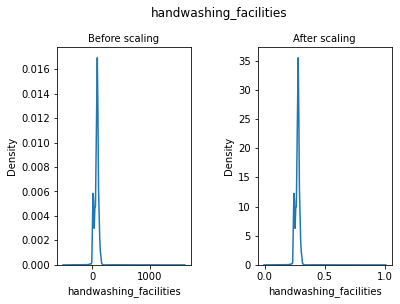

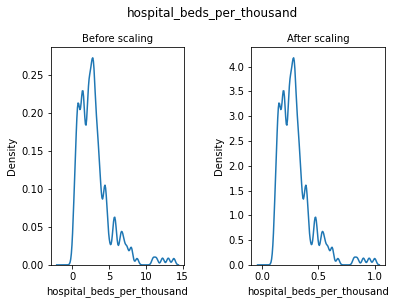

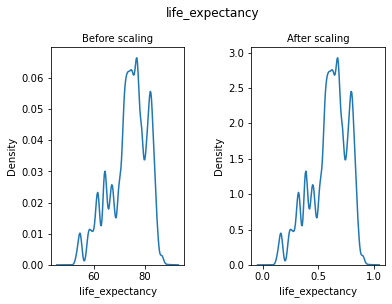

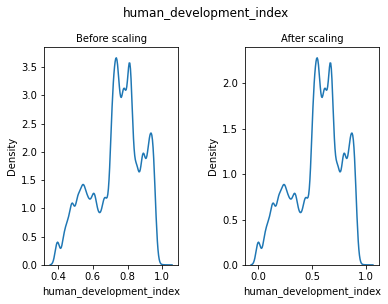

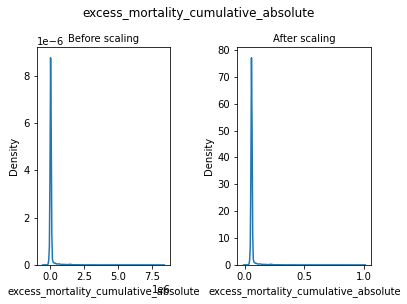

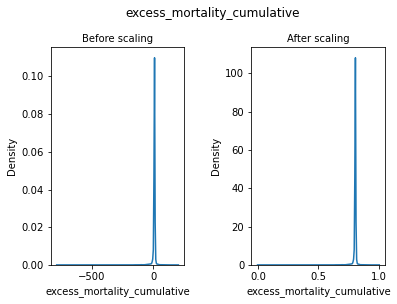

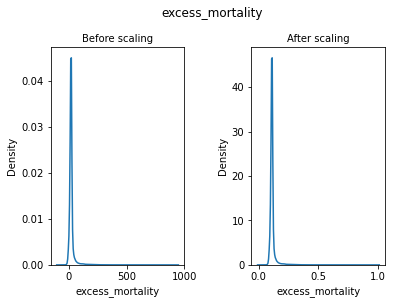

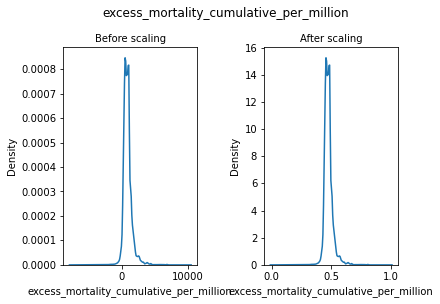

In [27]:
for column in non_gaussian_columns[40:]:
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=data, x=column,ax=ax[0])
    sns.kdeplot(data=data_transformed, x=column,ax=ax[1])
    ax[0].set_title('Before scaling',fontsize=10)
    ax[1].set_title('After scaling',fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(column,y=1.02)
    plt.show()

## Robust Scaler

Robust scaler is used for skewed distributions, where outliers are not removed by scaling features to similar scale using median and interquartile range.

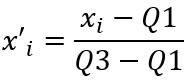

Note that robust scaler is not sensitive to outliers and can sometimes provide better results than standard scaler for variables with outliers.

In [28]:
scaler = few.SklearnTransformerWrapper(RobustScaler(),variables=numerical_columns)
data_transformed = scaler.fit_transform(data)

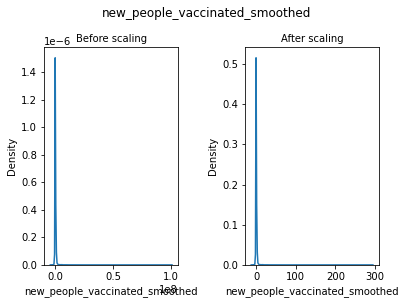

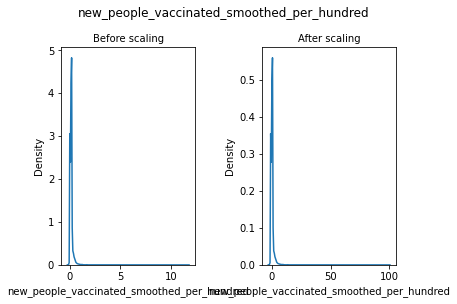

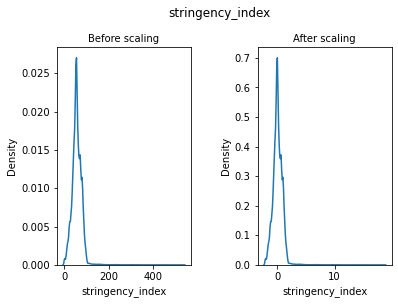

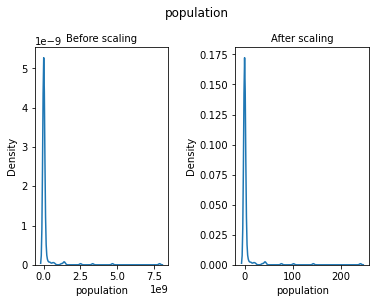

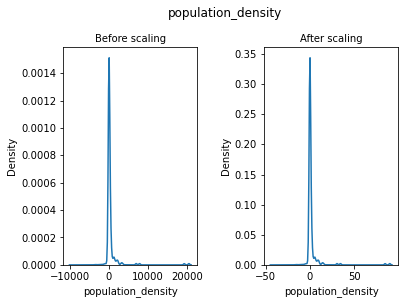

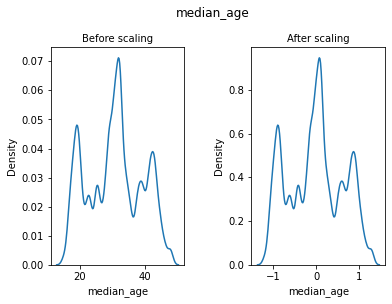

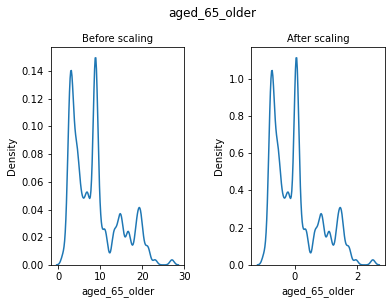

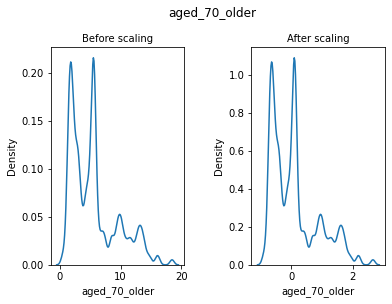

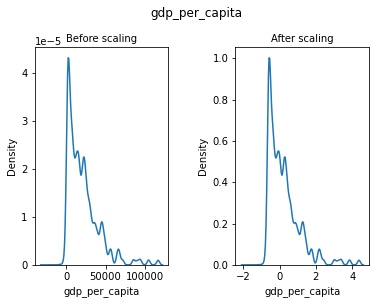

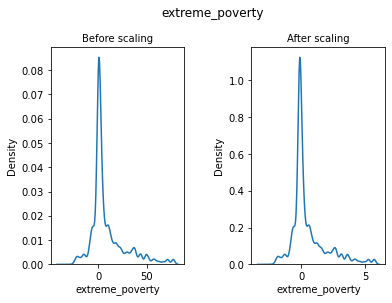

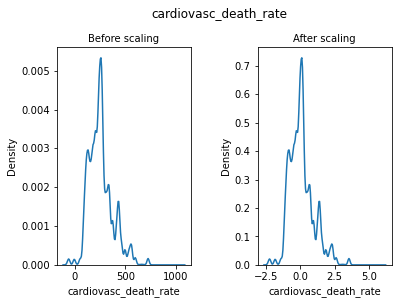

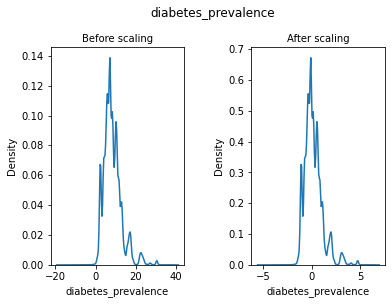

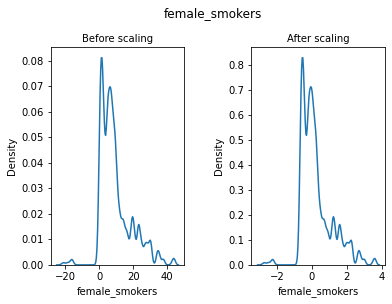

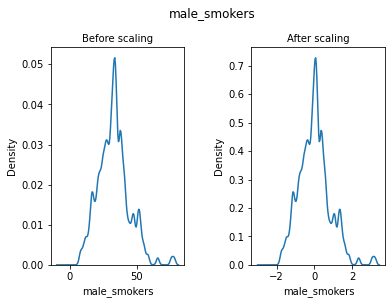

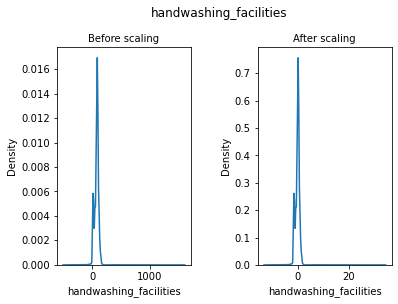

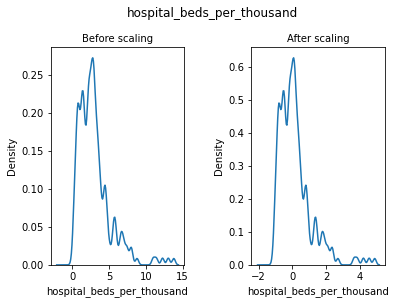

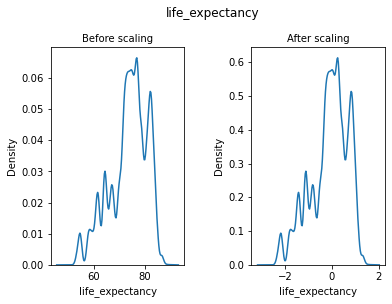

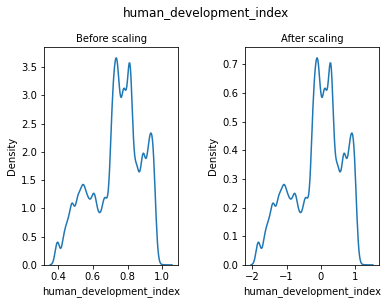

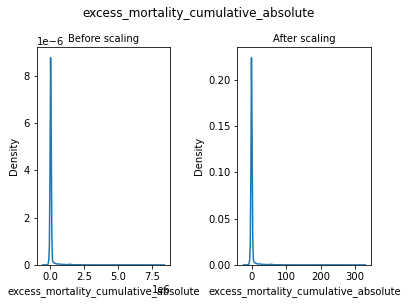

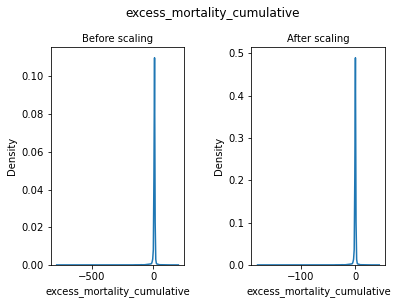

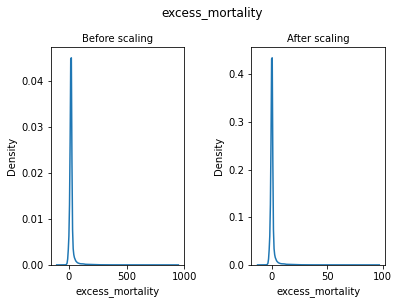

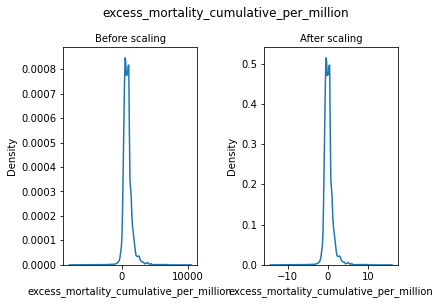

In [29]:
for column in non_gaussian_columns[40:]:
    f, ax = plt.subplots(1,2)
    sns.kdeplot(data=data, x=column,ax=ax[0])
    sns.kdeplot(data=data_transformed, x=column,ax=ax[1])
    ax[0].set_title('Before scaling',fontsize=10)
    ax[1].set_title('After scaling',fontsize=10)
    plt.subplots_adjust(wspace=0.5)
    plt.suptitle(column,y=1.02)
    plt.show()